# Handling Missing Values Techniques:

<img src='images/flow1.png' width=700 height=600>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Remove (Complete Case Analysis):

Assumptions:

1. Missing Completely at Random. (MCAR)

In [3]:
df = sns.load_dataset("titanic")

In [4]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
677,1,3,female,18.0,0,0,9.8417,S,Third,woman,False,NaN,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
804,1,3,male,27.0,0,0,6.9750,S,Third,man,True,NaN,Southampton,yes,True


In [20]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.shape

(891, 15)

In [ ]:
# ratio

print(np.round(((df['embarked'].isnull().sum())/len(df)),3)) # can remove rows
print(np.round(((df['age'].isnull().sum())/len(df)),3)) # cannot remove rows
print(np.round(((df['deck'].isnull().sum())/len(df)),3)) # cannot remove  rows / can remove column

0.0
0.199
0.774


In [23]:
df = df.dropna(subset=['embarked'])

In [24]:
df.shape

(889, 15)

In [25]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [30]:
df = df.drop(columns='deck')

In [31]:
df.shape

(889, 14)

In [32]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

# 1. Simple Imputer:

- The `SimpleImputer` class provides basic strategies for imputing missing values. 
- Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. 
- This class also allows for different missing values encodings.

### a. Numerical Data - Simple Imputer:

1. Mean / Median.
2. Arbitary Value Imputation.
3. End of Distribution.
4. Random Sample imputation.

### 1. Mean/Median imputaition

In [4]:
df1 = pd.read_csv("Datasets/house_purchased.csv")

In [15]:
df1.sample(3)

,price,area,purchased
81,6615000.0,NaN,1
339,3885000.0,3180.0,0
133,5810000.0,4800.0,0


In [16]:
df1.isnull().sum()

price        19
area         21
purchased     0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [22]:
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([
    ('imputer1',imputer1,['price']),
    ('imputer2',imputer2,['area'])
],remainder='passthrough')

In [23]:
new_X_train = trf.fit_transform(X_train)
new_X_test = trf.transform(X_test)

In [24]:
new_X_train = pd.DataFrame(new_X_train, columns=X_train.columns)
new_X_test = pd.DataFrame(new_X_test, columns=X_test.columns)

In [25]:
new_X_train

,price,area
0,3430000.0,2610.0
1,4270000.0,7770.0
2,2653000.0,3185.0
3,4900000.0,6720.0
4,4375000.0,3900.0
...,...,...
431,4200000.0,7000.0
432,2100000.0,3000.0
433,2800000.0,3960.0
434,2275000.0,1836.0


In [26]:
new_X_train.isnull().sum()

price    0
area     0
dtype: int64

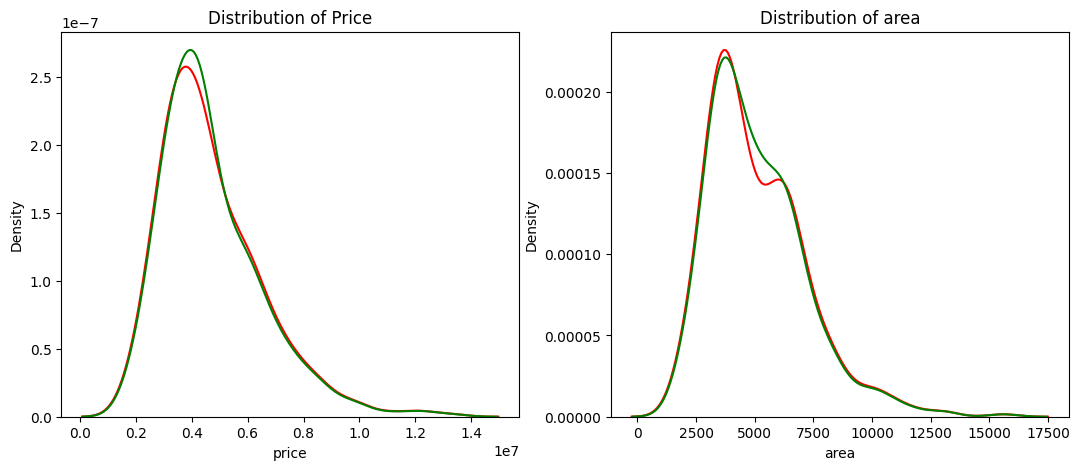

In [36]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))

sns.kdeplot(data=X_train, x='price',color='red',ax=ax1)
sns.kdeplot(data=new_X_train, x='price',color='green',ax=ax1)
ax1.set_title("Distribution of Price")

sns.kdeplot(data=X_train, x='area',color='red',ax=ax2)
sns.kdeplot(data=new_X_train, x='area',color='green',ax=ax2)
ax2.set_title("Distribution of area")

plt.show()

### 2. Arbitary value imputation:

In [37]:
X_train.isnull().sum()

price    16
area     17
dtype: int64

In [38]:
imputer1 = SimpleImputer(strategy='constant',fill_value=-1)
imputer2 = SimpleImputer(strategy='constant',fill_value=0)

In [40]:
trf1 = ColumnTransformer([
    ('imputer1',imputer1,['price']),
    ('imputer2',imputer2,['area'])
],remainder='passthrough')

In [41]:
new_X_train = trf1.fit_transform(X_train)
new_X_test = trf1.transform(X_test)

In [43]:
new_X_train = pd.DataFrame(new_X_train, columns=X_train.columns)
new_X_test = pd.DataFrame(new_X_test, columns=X_test.columns)

In [45]:
new_X_train.isnull().sum()

price    0
area     0
dtype: int64

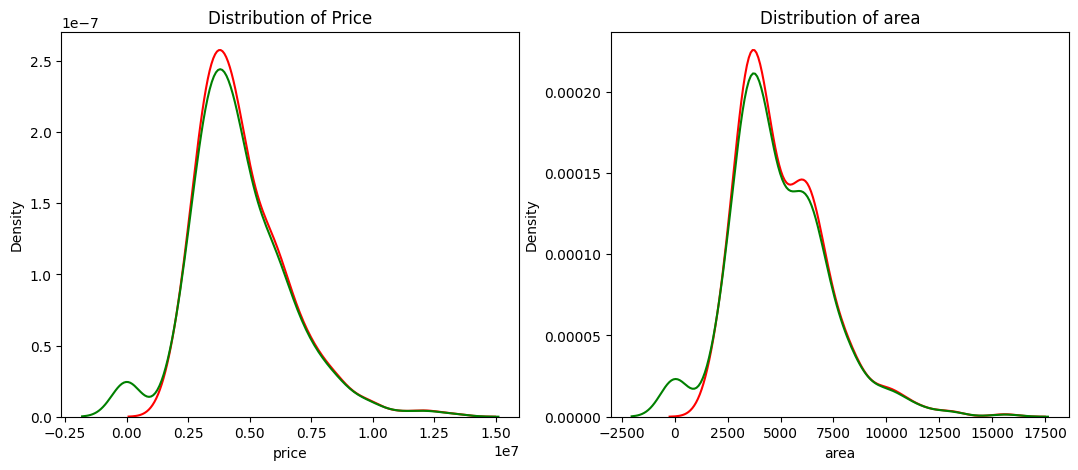

In [46]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))

sns.kdeplot(data=X_train, x='price',color='red',ax=ax1)
sns.kdeplot(data=new_X_train, x='price',color='green',ax=ax1)
ax1.set_title("Distribution of Price")

sns.kdeplot(data=X_train, x='area',color='red',ax=ax2)
sns.kdeplot(data=new_X_train, x='area',color='green',ax=ax2)
ax2.set_title("Distribution of area")

plt.show()